In [39]:
def read_student_data(file_path):
    """Read data from csv file and return"""
    students_list = []
    with open(file_path, mode='r') as file:
        headers = file.readline().strip().split(",")
        for line in file:
            student = {}
            values = line.strip().split(",")
            for i, header in enumerate(headers):
                student[header.strip()] = values[i].strip()
                if header.strip() == "CGPA":
                    student[header.strip()] = float(student[header.strip()])

            students_list.append(student)

    return students_list


def pick_student(all_students, tut_grp):
    """pick student out from the tutorial group"""
    students_list = []

    for student in all_students:
        if student['Tutorial Group'] == f'G-{tut_grp}':
            students_list.append(student)

    return students_list


def diverse_team(sorted_student_more, sorted_student_less):  # index(0,-1,or middle)
    team = []
    i = 0  # round
    sorted_student = [sorted_student_more, sorted_student_less]

    gender_index = 0

    while len(team) < 5 and (sorted_student[0] or sorted_student[1]):  # add student into team when teams is not full
        index_changes = [+1, -1, +1]
        pick_index = [0, -1, len(sorted_student[gender_index]) // 2]
        while True:
            if not sorted_student[gender_index]:
                break
            elif index_changes[i] >= 0 and pick_index[i] + index_changes[i] < len(sorted_student[gender_index]) and index_changes[
                i] <= 5:
                # Check if school is not in the team
                if sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] not in [student['School'] for student in
                                                                                                    team]:
                    team.append(sorted_student[gender_index].pop(pick_index[i] + index_changes[i]))
                    break
                else:
                    index_changes[i] += 1
            elif index_changes[i] < 0 and abs(pick_index[i] + index_changes[i]) <= len(sorted_student[gender_index]) and abs(
                    index_changes[i]) <= 5:
                # Check if school is not in the team
                if sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] not in [student['School'] for student in
                                                                                                    team]:
                    team.append(sorted_student[gender_index].pop(pick_index[i] + index_changes[i]))
                    break
                else:
                    index_changes[i] -= 1
            else:
                # If the index exceeds the list length, reset index_changes or break
                team.append(sorted_student[gender_index].pop(pick_index[i]))
                break

        i += 1
        gender_index += 1
        if i > 2:
            i = 0
        if gender_index > 1:
            gender_index = 0

    return team


def division_into_team(students_list):
    """Divides student from student_list into group of 5 with balance of cgpa and gender, and diverse of school"""
    # Separate male and female students into two lists
    male_students = [student for student in students_list if student['Gender'] == 'Male']
    female_students = [student for student in students_list if student['Gender'] == 'Female']

    # Sort the male and female students by CGPA
    male_sorted_students = sorted(male_students, key=lambda student: student['CGPA'])
    female_sorted_students = sorted(female_students, key=lambda student: student['CGPA'])

    teams = [[] for _ in range(len(students_list) // 5)]
    team_index = 0

    while team_index < len(teams):  # while haven't added student into all teams
        if len(male_sorted_students) >= len(female_sorted_students):  # if remain male student more than remain female student
            teams[team_index] = diverse_team(male_sorted_students, female_sorted_students)

        else:  # if remain male student less than remain female student
            teams[team_index] = diverse_team(female_sorted_students, male_sorted_students)

        team_index += 1

    return teams


def see_group_division(group_div):
    for i, x in enumerate(group_div):
        print(f"Group {i}")
        cgpa = 0
        for j in x:
            print(j["Student ID"], j["School"], j["CGPA"], j["Gender"])
            cgpa += j["CGPA"]
        print(f" the mean cgpa of this group is {cgpa / len(x)}")
        print()


students = read_student_data('records.csv')
group_division = []
tutorial_grp = 1

while tutorial_grp <= 150:
    group_division.extend(division_into_team(pick_student(students, tutorial_grp)))
    tutorial_grp += 1

see_group_division(group_division)

with open("group-base.txt", mode="w") as f:
    for i, x in enumerate(group_division):
        f.write(f"Group {i}\n")
        cgpa = 0
        for j in x:
            l = f"{j['Student ID'], j['School'], j['CGPA'], j['Gender']}\n"
            f.write(l)
            cgpa += j["CGPA"]
        f.write(f" the mean cgpa of this group is {cgpa / len(x)}\n")
        f.write("\n")


Group 0
2353 SBS 3.95 Female
2091 EEE 4.2 Male
592 MSE 4.11 Female
1645 CoE 3.93 Male
2069 SSS 4.48 Female
 the mean cgpa of this group is 4.134

Group 1
2326 CoB (NBS) 3.95 Female
3989 WKW SCI 4.15 Male
4479 CCDS 4.11 Female
3148 EEE 3.88 Male
4338 SPMS 4.22 Female
 the mean cgpa of this group is 4.061999999999999

Group 2
4563 WKW SCI 4.01 Female
2776 CCEB 4.14 Male
5703 SPMS 4.12 Female
4657 SoH 4.0 Male
809 CoB (NBS) 4.26 Female
 the mean cgpa of this group is 4.106

Group 3
2151 EEE 4.02 Female
1841 MAE 4.12 Male
1271 SSS 4.17 Female
288 CoB (NBS) 4.01 Male
4820 CoE 4.22 Female
 the mean cgpa of this group is 4.108

Group 4
2115 EEE 4.03 Female
1417 CoE 4.12 Male
945 MAE 4.1 Female
5002 CCDS 4.02 Male
659 SSS 4.2 Female
 the mean cgpa of this group is 4.093999999999999

Group 5
567 CoB (NBS) 4.03 Female
4520 EEE 4.11 Male
2650 SoH 4.09 Female
588 MAE 4.06 Male
4402 CCDS 4.08 Female
 the mean cgpa of this group is 4.074

Group 6
75 CCDS 4.03 Female
5477 SoH 4.09 Male
3930 EEE 4.18 

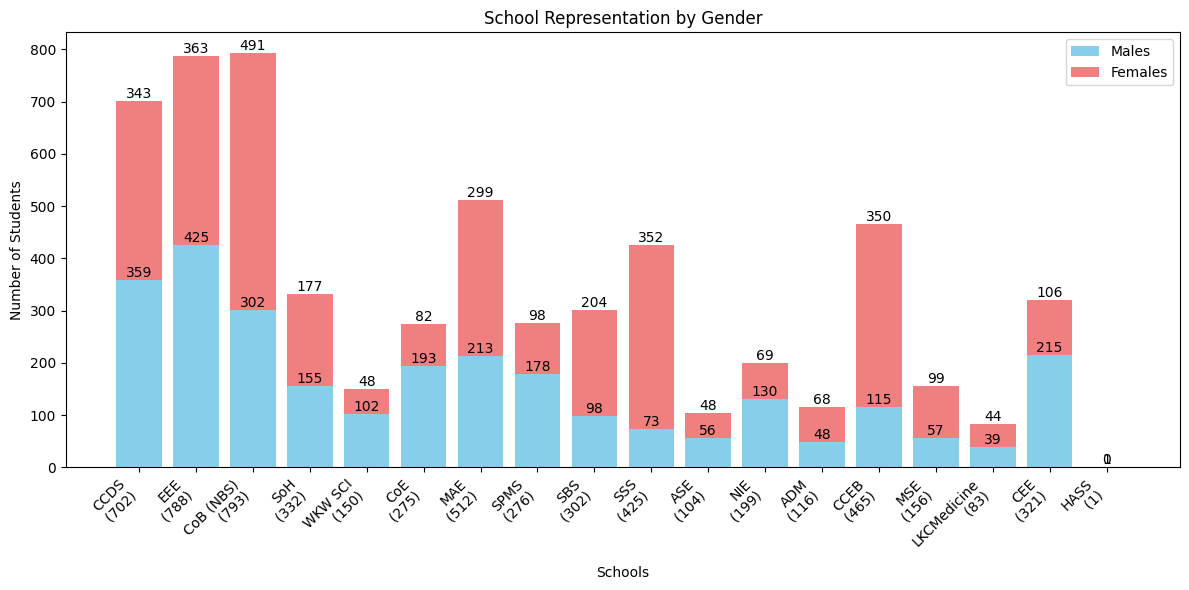

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def count_students_by_school(students):
    """Count the number of males and females from each school."""
    school_counts = defaultdict(lambda: {'Male': 0, 'Female': 0})

    for student in students:
        school = student['School']
        if student['Gender'] == 'Male':
            school_counts[school]['Male'] += 1
        else:
            school_counts[school]['Female'] += 1

    return school_counts

def visualize_school_representation(school_counts):
    """Visualize the representation of males and females from each school in a stacked bar chart."""
    schools = list(school_counts.keys())
    males = [school_counts[school]['Male'] for school in schools]
    females = [school_counts[school]['Female'] for school in schools]
    total_students = [school_counts[school]['Male'] + school_counts[school]['Female'] for school in schools]  # Total students in each school

    x = range(len(schools))  # x-axis locations

    plt.figure(figsize=(12, 6))
    bars_male = plt.bar(x, males, label='Males', color='skyblue')
    bars_female = plt.bar(x, females, bottom=males, label='Females', color='lightcoral')  # Stack females on top of males

    # Adding counts on top of each bar
    for bar in bars_male:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
                 ha='center', va='bottom', fontsize=10)  # Centered above male bar

    for bar in bars_female:
        yval = bar.get_height() + bars_male[bars_female.index(bar)].get_height()  # Get the top of the stacked female bar
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(bar.get_height()), 
                 ha='center', va='bottom', fontsize=10)  # Centered above female bar

    # Updating x-ticks to include total students
    x_labels = [f"{school}\n ({total})" for school, total in zip(schools, total_students)]
    plt.xticks(x, x_labels, rotation=45, ha='right')

    plt.xlabel('Schools')
    plt.ylabel('Number of Students')
    plt.title('School Representation by Gender')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming you have already read your student data
students = read_student_data('records.csv')  # Use your function to read data
school_counts = count_students_by_school(students)
visualize_school_representation(school_counts)

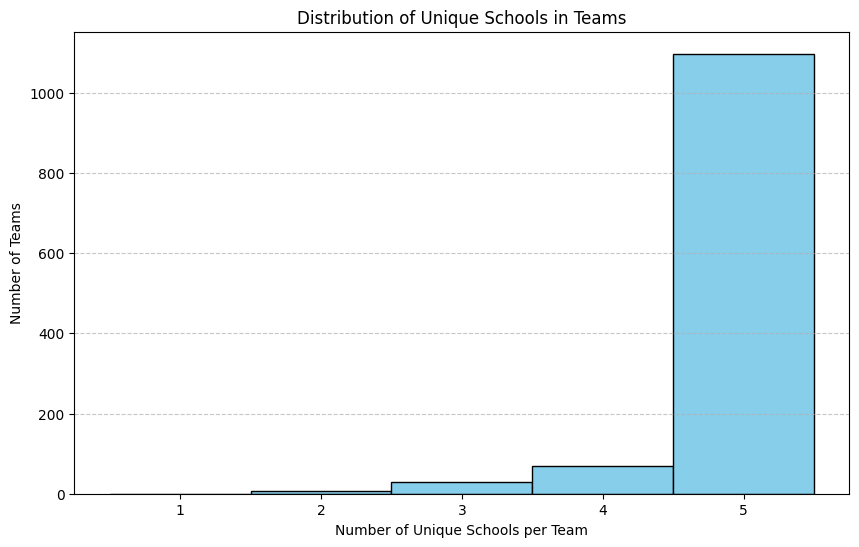

In [38]:
def count_unique_schools_in_division(group_division):
    """Count the number of unique schools in each team."""
    unique_school_counts = []

    for team in group_division:
        schools_in_team = set(student['School'] for student in team)  # Use a set to get unique schools
        unique_school_counts.append(len(schools_in_team))  # Count of unique schools

    return unique_school_counts

def visualize_unique_school_distribution(unique_school_counts):
    """Visualize the distribution of unique schools in teams as a histogram."""
    plt.figure(figsize=(10, 6))
    plt.hist(unique_school_counts, bins=range(1, max(unique_school_counts) + 2), 
             color='skyblue', edgecolor='black', align='left')
    
    plt.xticks(range(1, max(unique_school_counts) + 1))  # Set x-ticks
    plt.xlabel("Number of Unique Schools per Team")
    plt.ylabel("Number of Teams")
    plt.title("Distribution of Unique Schools in Teams")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

# Assuming you have your group_division variable from previous code
unique_school_counts = count_unique_schools_in_division(group_division)
visualize_unique_school_distribution(unique_school_counts)

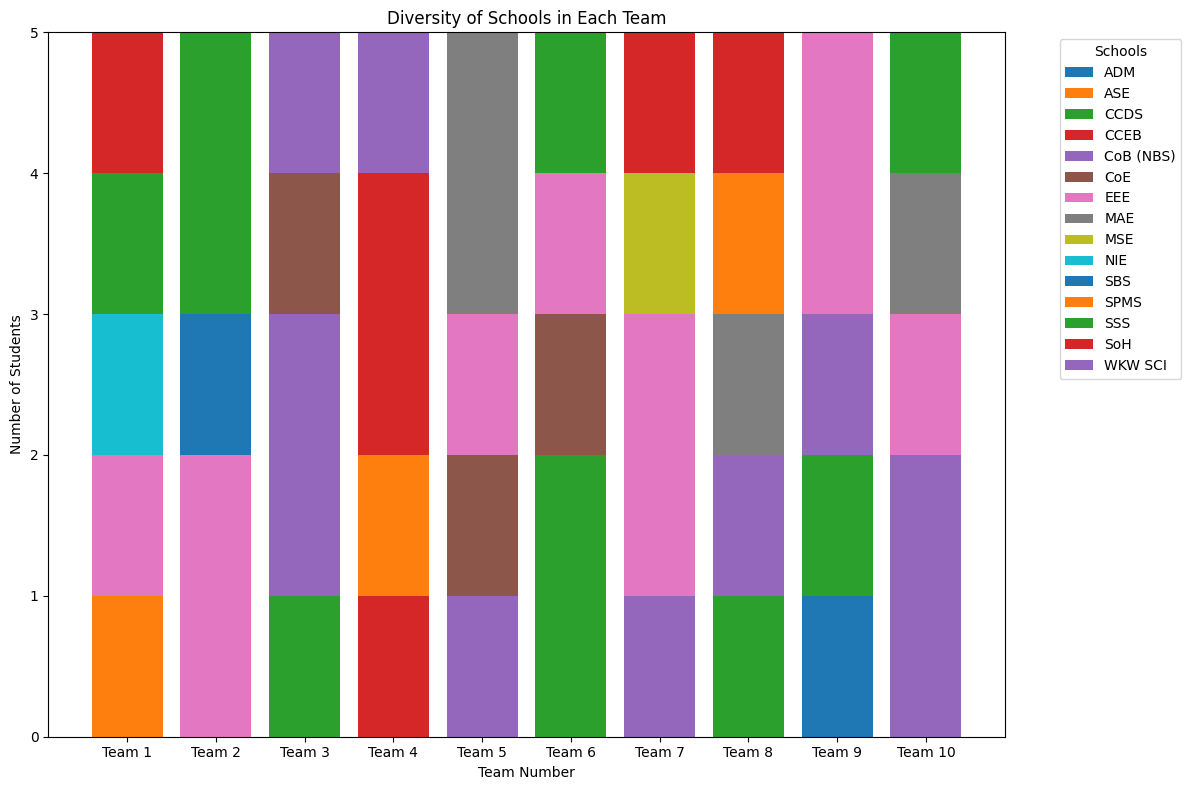

In [9]:
#messy and hard to view. will be troublesome when student per team is 10. 

import matplotlib.pyplot as plt
import numpy as np

def count_students_by_school_in_teams(group_division):
    """Count the number of students from each school in each team."""
    school_counts_per_team = []
    
    for team in group_division:
        school_counts = {}
        for student in team:
            school = student['School']
            if school not in school_counts:
                school_counts[school] = 0
            school_counts[school] += 1
        school_counts_per_team.append(school_counts)
    
    return school_counts_per_team

def visualize_school_diversity_per_team(school_counts_per_team):
    """Visualize the diversity of schools in each team using a stacked bar chart."""
    # Get unique schools
    all_schools = set()
    for counts in school_counts_per_team:
        all_schools.update(counts.keys())
    
    all_schools = sorted(all_schools)  # Sort schools for consistent ordering
    team_count = len(school_counts_per_team)
    school_count = len(all_schools)
    
    # Prepare the data for the stacked bar chart
    data_matrix = np.zeros((team_count, school_count))

    for i, counts in enumerate(school_counts_per_team):
        for j, school in enumerate(all_schools):
            data_matrix[i, j] = counts.get(school, 0)  # Fill in the counts or 0 if not present

    # Plotting
    plt.figure(figsize=(12, 8))
    bottom_values = np.zeros(team_count)  # Initialize bottom for stacking

    for j in range(school_count):
        plt.bar(range(team_count), data_matrix[:, j], bottom=bottom_values, label=all_schools[j])
        bottom_values += data_matrix[:, j]  # Update the bottom for the next stack

    plt.xlabel('Team Number')
    plt.ylabel('Number of Students')
    plt.title('Diversity of Schools in Each Team')
    plt.xticks(range(team_count), [f'Team {i + 1}' for i in range(team_count)])  # Custom x-tick labels
    plt.legend(title='Schools', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Assuming you have already formed your teams
school_counts_per_team = count_students_by_school_in_teams(group_division)
visualize_school_diversity_per_team(school_counts_per_team)

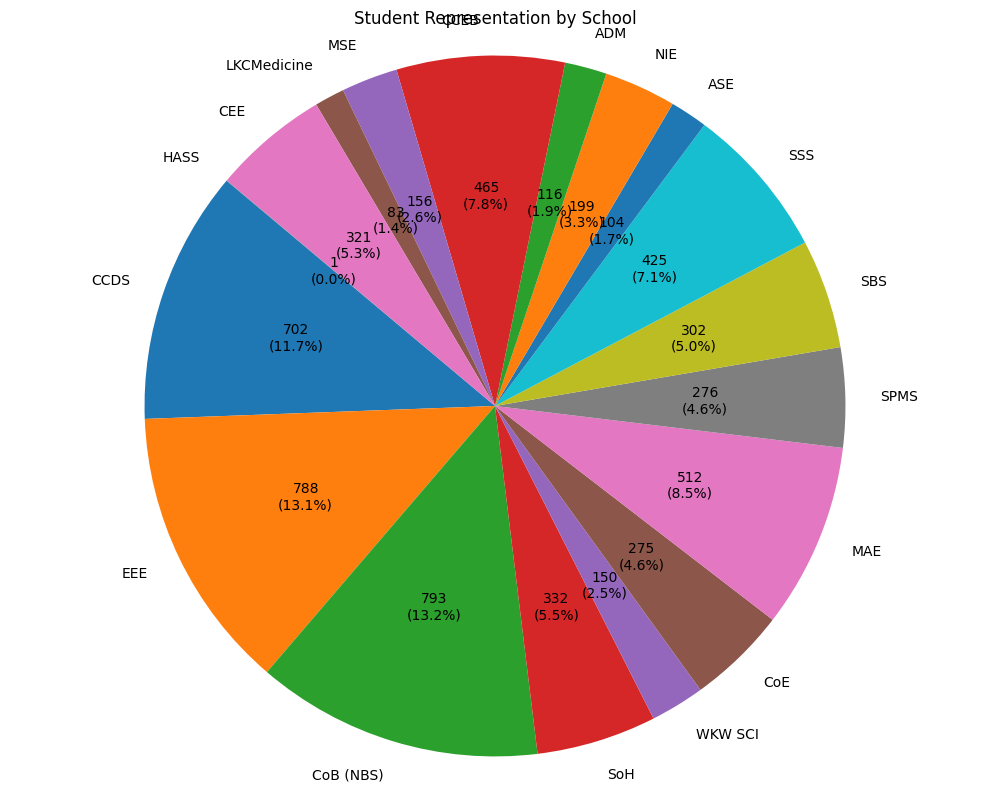

In [8]:
# so messy ! 


import matplotlib.pyplot as plt

def visualize_school_pie_chart(school_counts):
    """Visualize the representation of students from different schools as a pie chart."""
    schools = list(school_counts.keys())
    total_students = [school_counts[school]['Male'] + school_counts[school]['Female'] for school in schools]  # Total students in each school

    plt.figure(figsize=(10, 8))
    plt.pie(total_students, labels=schools, autopct=lambda p: '{:.0f}'.format(p * sum(total_students) / 100) + f'\n({p:.1f}%)', startangle=140)
    plt.title('Student Representation by School')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

# Assuming you have already read your student data
students = read_student_data('records.csv')  # Use your function to read data
school_counts = count_students_by_school(students)
visualize_school_pie_chart(school_counts)